In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster

In [58]:
data1 = np.random.randint(0, 100, (50, 2))
data2 = np.random.sample((30, 2)) * np.array([40, 40]) 
data3 = (np.dot(np.random.randn(20, 2), np.array([[2, 3], [9, 11]])) + np.array([80, 65]))

In [59]:
data = np.concatenate((data1, data2.astype(int), data3.astype(int)))

In [76]:
def result(model: cluster, data: np.array, showClusters=True):
    
    m = model.fit(data)
    dataByLabel = dict()
    labels = m.labels_
    
    for index, point in enumerate(data):
        label = labels[index]
        if label not in dataByLabel:
            dataByLabel[label] = []
        dataByLabel[label].append(point)
        
    for index in dataByLabel:
        group = np.array(dataByLabel[index])
        
    fig, ax = plt.subplots(figsize=(10, 8))
    for index in dataByLabel:
        group = np.array(dataByLabel[index])
        ax.scatter(group[:, 0], group[:, 1], 8)
    if showClusters:
        centers = m.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], color='black')
    plt.show()

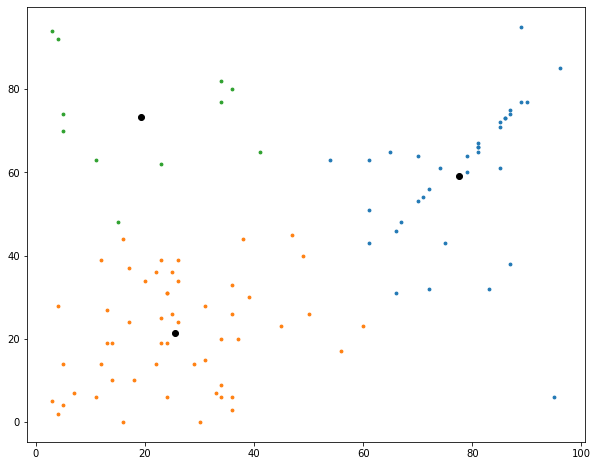

In [77]:
result(cluster.KMeans(n_clusters=3, random_state=0), data)

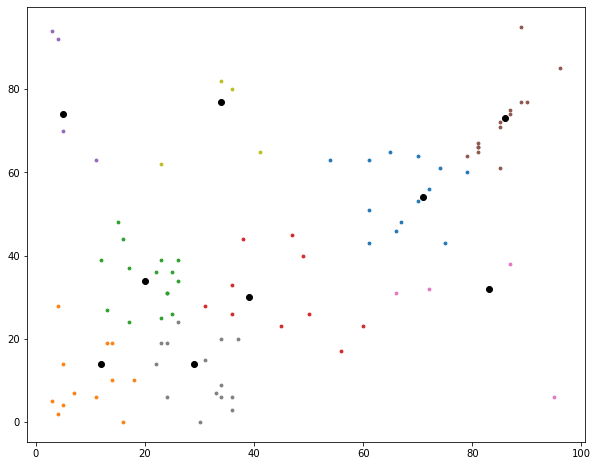

In [78]:
result(cluster.AffinityPropagation(random_state=5), data)

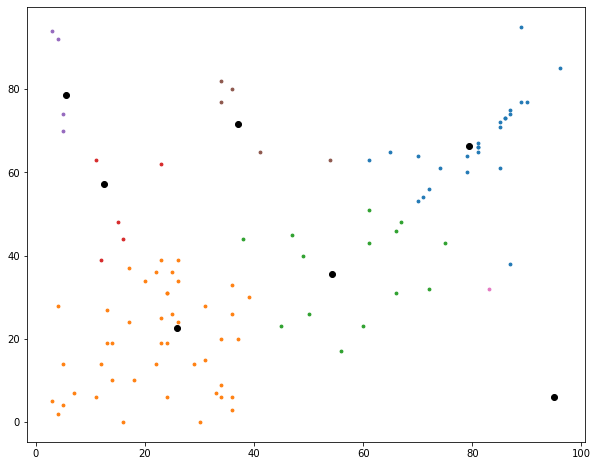

In [79]:
result(cluster.MeanShift(bandwidth=20), data)

/home/alex/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


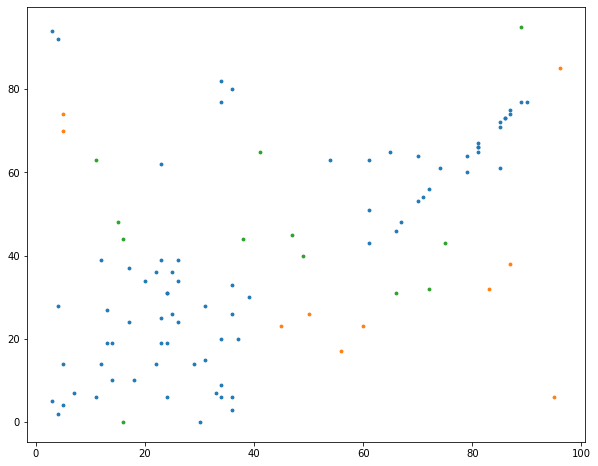

In [83]:
result(cluster.SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=0), data, False)

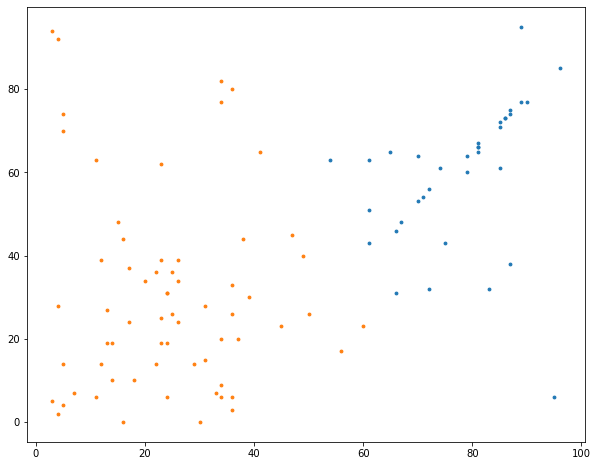

In [82]:
result(cluster.AgglomerativeClustering(), data, False)

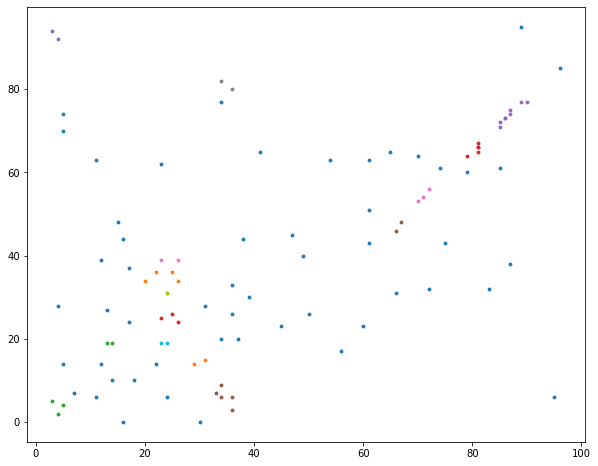

In [85]:
result(cluster.DBSCAN(eps=3, min_samples=2), data, False)

/home/alex/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


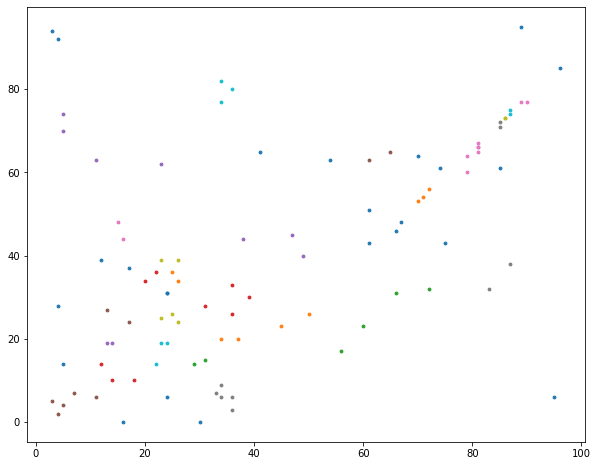

In [86]:
result(cluster.OPTICS(min_samples=2), data, False)

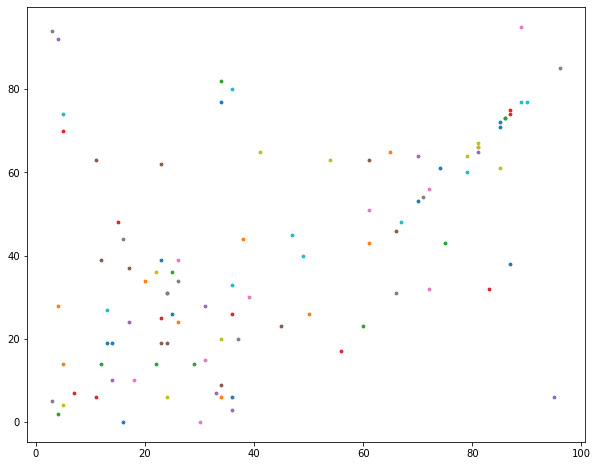

In [87]:
result(cluster.Birch(n_clusters=None), data, False)